In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-03-31 19:20:59.428721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-31 19:20:59.432840: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-31 19:20:59.443314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743445259.461068  314597 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743445259.466215  314597 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743445259.480424  314597 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


2025-03-31 19:21:01.095197: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-31 19:21:01.095220: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-03-31 19:21:01.095225: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: alexandre
2025-03-31 19:21:01.095230: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: alexandre
2025-03-31 19:21:01.095391: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 550.144.3
2025-03-31 19:21:01.095412: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 550.144.3
2

In [3]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)


classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

100%|██████████| 17/17 [00:00<00:00, 1647.22it/s]


# CNN with adam momentum

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-03-31 19:21:03.468590: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - accuracy: 0.2596 - loss: 1.8856 - val_accuracy: 0.3994 - val_loss: 1.5000
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.4102 - loss: 1.4585 - val_accuracy: 0.4604 - val_loss: 1.3214
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.4857 - loss: 1.3053 - val_accuracy: 0.5427 - val_loss: 1.1911
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.5242 - loss: 1.2170 - val_accuracy: 0.5396 - val_loss: 1.2514
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 325ms/step - accuracy: 0.5869 - loss: 1.1175 - val_accuracy: 0.5793 - val_loss: 1.0969
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.6015 - loss: 1.0176 - val_accuracy: 0.5762 - val_loss: 1.0806
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.6296 - loss: 0.9359 - val_accuracy: 0.6372 - val_loss: 1.0562
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.6849 - loss: 0.8389 - val_accuracy: 0.634

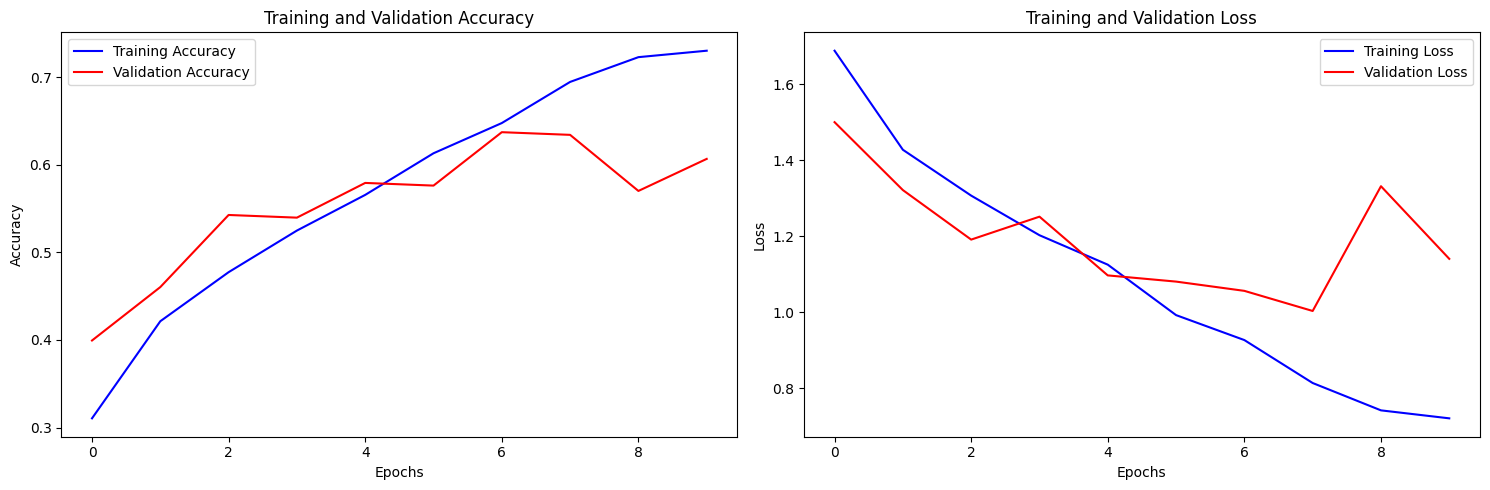

Training Accuracy: 0.7302036285400391
Validation Accuracy: 0.6067073345184326
Training Loss: 0.7208418250083923
Validation Loss: 1.1404739618301392


In [4]:
#Building the CNN model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('cnn_model.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L2 Regularization


Epoch 1/10


2025-03-31 19:24:15.404732: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step - accuracy: 0.2372 - loss: 2.0030 - val_accuracy: 0.4360 - val_loss: 1.5393
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.4801 - loss: 1.4537 - val_accuracy: 0.4970 - val_loss: 1.3950
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.5775 - loss: 1.2325 - val_accuracy: 0.5274 - val_loss: 1.3114
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.6240 - loss: 1.1265 - val_accuracy: 0.4604 - val_loss: 1.5376
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.6414 - loss: 1.0976 - val_accuracy: 0.5793 - val_loss: 1.3015
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.7016 - loss: 0.9713 - val_accuracy: 0.5732 - val_loss: 1.3127
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.7171 - loss: 0.9190 - val_accuracy: 0.6159 - val_loss: 1.3325
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.7776 - loss: 0.8174 - val_accuracy: 0.597

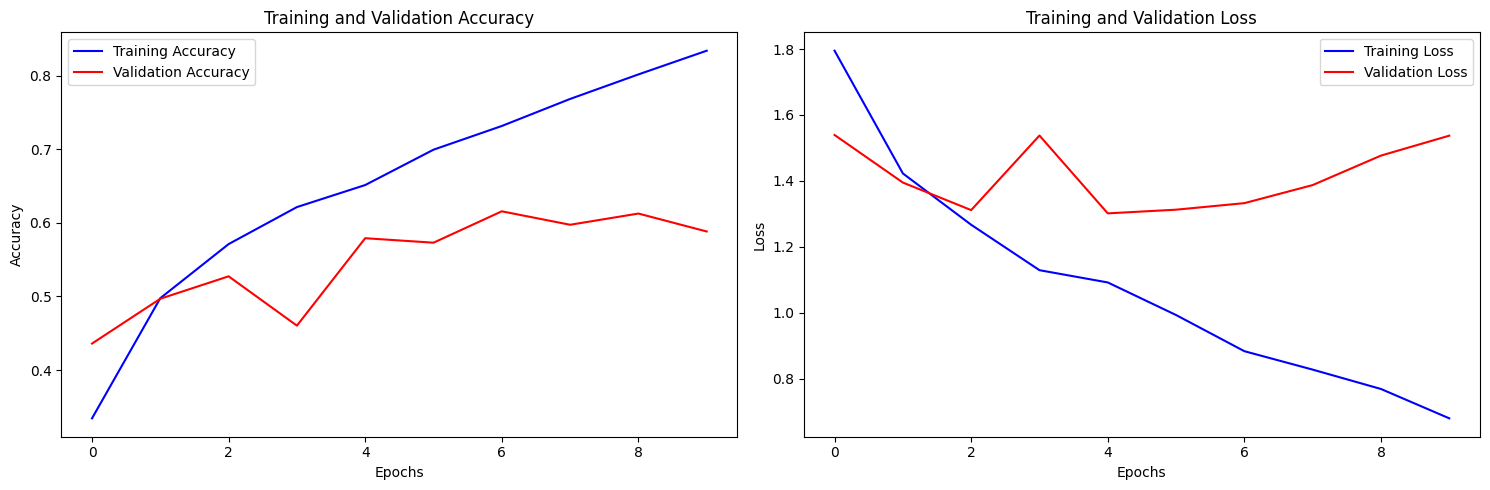

Training Accuracy: 0.834276020526886
Validation Accuracy: 0.5884146094322205
Training Loss: 0.6795964241027832
Validation Loss: 1.537253975868225


In [5]:

from keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Flatten())
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(6, activation='softmax'))

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l2.save('cnn_model_l2.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L1 Regularization


Epoch 1/10


2025-03-31 19:27:25.567415: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step - accuracy: 0.2086 - loss: 15.0890 - val_accuracy: 0.1921 - val_loss: 3.1603
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.2111 - loss: 2.9732 - val_accuracy: 0.2530 - val_loss: 2.6692
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.2312 - loss: 2.6275 - val_accuracy: 0.1921 - val_loss: 2.5333
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.2233 - loss: 2.5135 - val_accuracy: 0.2744 - val_loss: 2.4483
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.2206 - loss: 2.4367 - val_accuracy: 0.3018 - val_loss: 2.4423
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.2951 - loss: 2.3979 - val_accuracy: 0.2530 - val_loss: 2.3680
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.3297 - loss: 2.3349 - val_accuracy: 0.3720 - val_loss: 2.3037
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.3860 - loss: 2.2806 - val_accuracy: 0.41

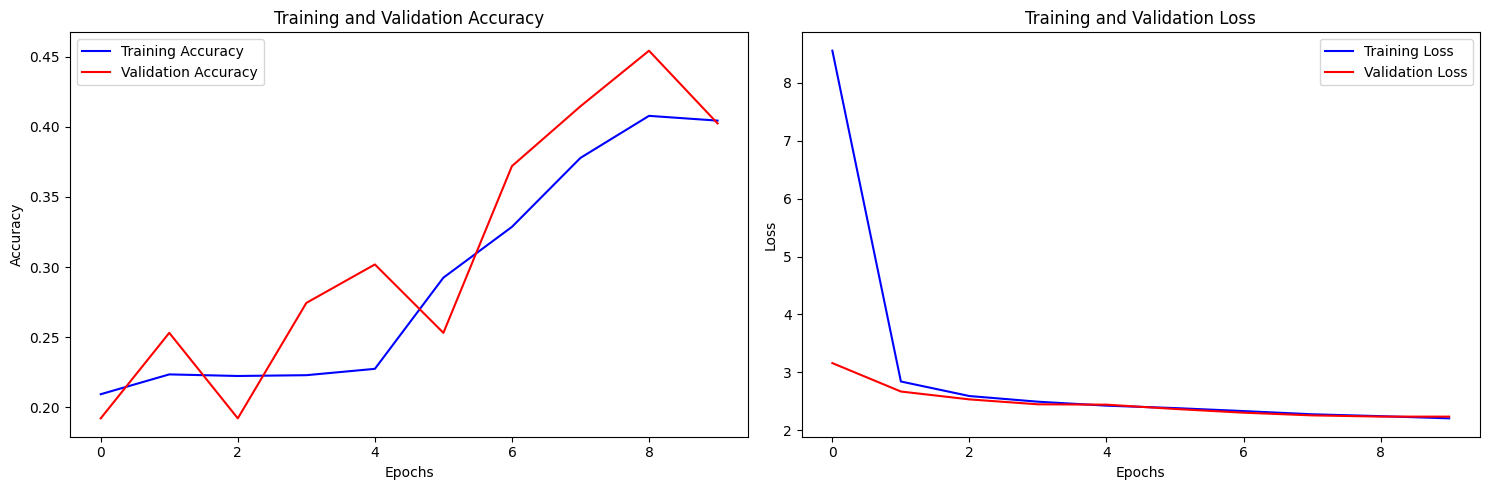

Training Accuracy: 0.40441176295280457
Validation Accuracy: 0.40243902802467346
Training Loss: 2.206007480621338
Validation Loss: 2.2356200218200684


In [6]:

from keras.regularizers import l1

model_l1 = Sequential()
model_l1.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(0.001), input_shape=(150, 150, 3)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Flatten())
model_l1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(6, activation='softmax'))

model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

model_l1.save('cnn_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout Only


Epoch 1/10


2025-03-31 19:35:18.496072: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - accuracy: 0.2308 - loss: 1.7825 - val_accuracy: 0.3841 - val_loss: 1.4968
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 344ms/step - accuracy: 0.3918 - loss: 1.4758 - val_accuracy: 0.4299 - val_loss: 1.3434
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.4573 - loss: 1.3348 - val_accuracy: 0.4756 - val_loss: 1.2380
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.5091 - loss: 1.2107 - val_accuracy: 0.5396 - val_loss: 1.2190
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 333ms/step - accuracy: 0.5330 - loss: 1.1842 - val_accuracy: 0.5518 - val_loss: 1.1443
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.5832 - loss: 1.0390 - val_accuracy: 0.5762 - val_loss: 1.1543
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.6212 - loss: 0.9540 - val_accuracy: 0.5701 - val_loss: 1.1813
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.6602 - loss: 0.8494 - val_accuracy: 0.618

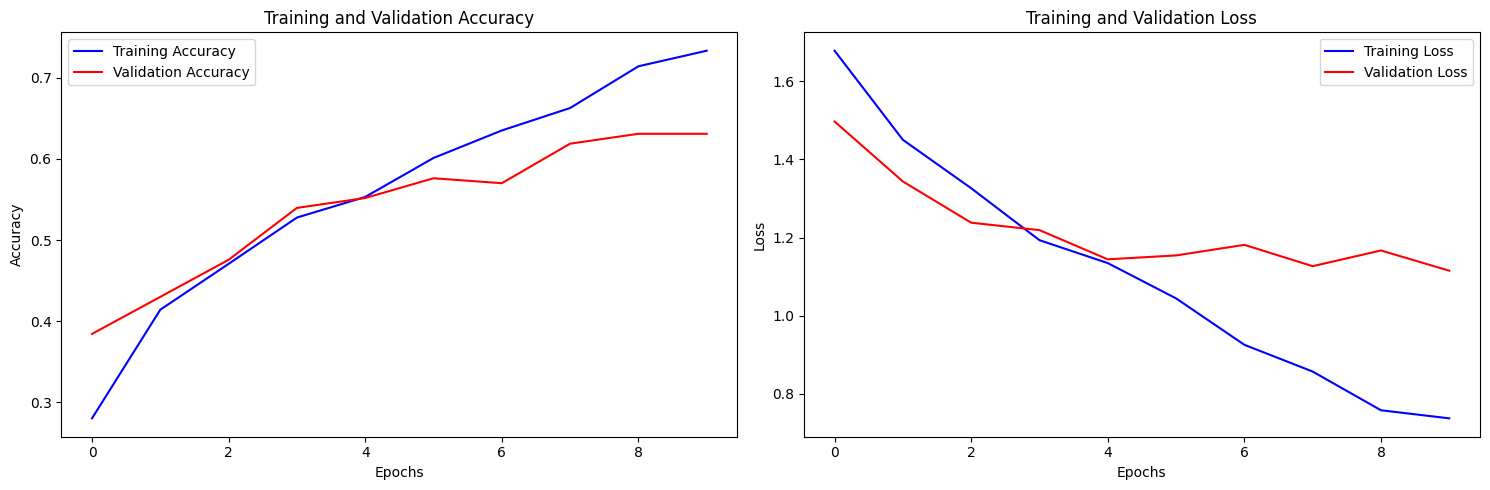

Training Accuracy: 0.7335972785949707
Validation Accuracy: 0.6310975551605225
Training Loss: 0.7376002073287964
Validation Loss: 1.1151684522628784


In [8]:

model_dropout = Sequential()
model_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Flatten())
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(6, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dropout.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

model_dropout.save('cnn_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with EarlyStopping Only


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.2027 - loss: 1.8489 - val_accuracy: 0.3049 - val_loss: 1.5918
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 333ms/step - accuracy: 0.4234 - loss: 1.4341 - val_accuracy: 0.4817 - val_loss: 1.2992
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.5252 - loss: 1.1552 - val_accuracy: 0.4970 - val_loss: 1.2228
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.6369 - loss: 0.9923 - val_accuracy: 0.5640 - val_loss: 1.2224
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.6958 - loss: 0.8133 - val_accuracy: 0.5640 - val_loss: 1.1791
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.7968 - loss: 0.5966 - val_accuracy: 0.6067 - val_loss: 1.3485
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.8421 - loss: 0.4553 - val_accuracy: 0.5915 - val_loss: 1.5250
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.8456 - loss: 0.4671 - val_accu

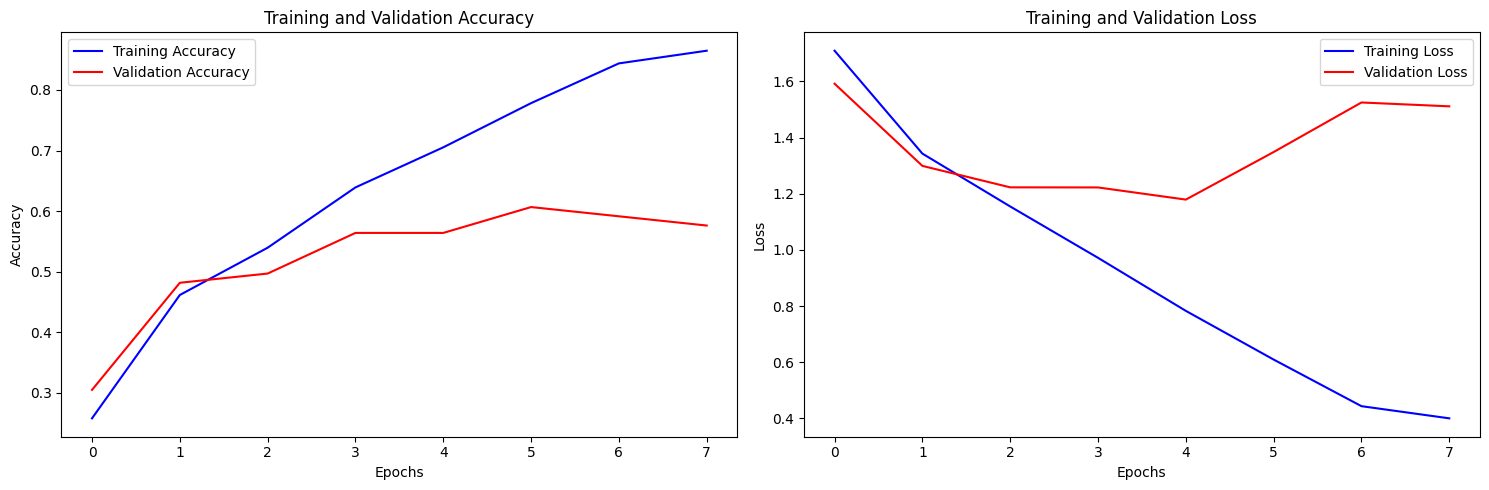

Training Accuracy: 0.8648189902305603
Validation Accuracy: 0.5762194991111755
Training Loss: 0.4000919461250305
Validation Loss: 1.51129150390625


In [9]:

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_es = Sequential()
model_es.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Conv2D(64, (3, 3), activation='relu'))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Conv2D(128, (3, 3), activation='relu'))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Flatten())
model_es.add(Dense(128, activation='relu'))
model_es.add(Dense(6, activation='softmax'))

model_es.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_es.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


model_es.save('cnn_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout + EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 342ms/step - accuracy: 0.2109 - loss: 1.8652 - val_accuracy: 0.4421 - val_loss: 1.4741
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.3867 - loss: 1.4937 - val_accuracy: 0.3902 - val_loss: 1.4445
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.4414 - loss: 1.3664 - val_accuracy: 0.4939 - val_loss: 1.2509
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 327ms/step - accuracy: 0.5069 - loss: 1.2535 - val_accuracy: 0.5000 - val_loss: 1.1786
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.5534 - loss: 1.0983 - val_accuracy: 0.5244 - val_loss: 1.1905
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.5809 - loss: 1.0477 - val_accuracy: 0.5244 - val_loss: 1.1625
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.6593 - loss: 0.9126 - val_accuracy: 0.5915 - val_loss: 1.1524
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.6560 - loss: 0.9185 - val_accu

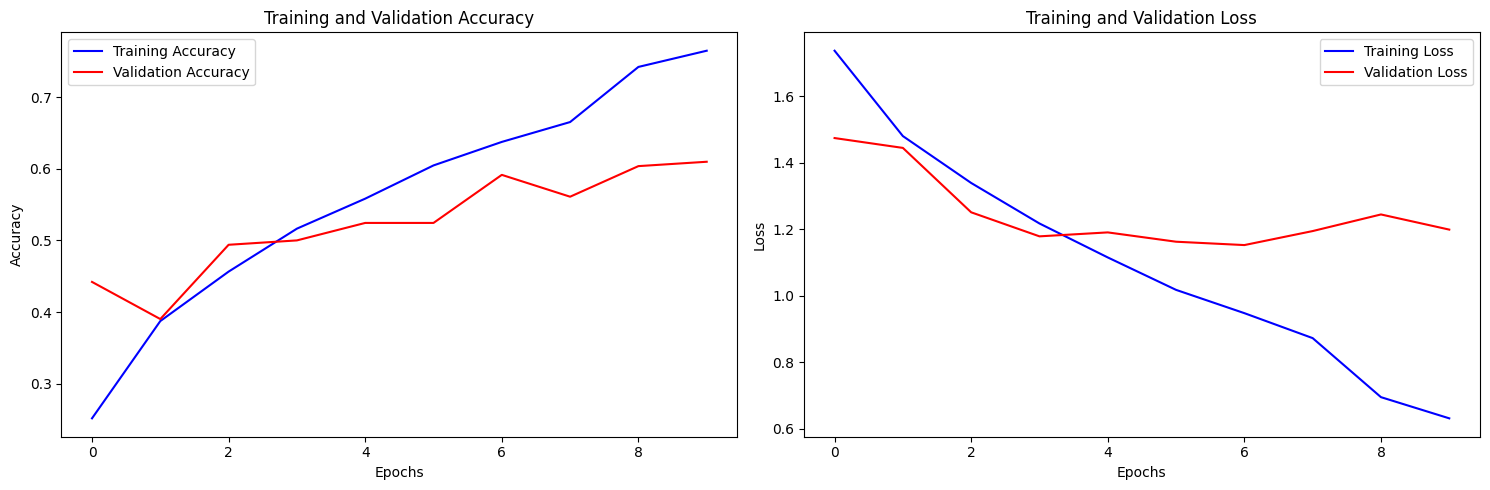

Training Accuracy: 0.7647058963775635
Validation Accuracy: 0.6097561120986938
Training Loss: 0.6314290165901184
Validation Loss: 1.198855996131897


In [10]:

model_de = Sequential()
model_de.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Conv2D(64, (3, 3), activation='relu'))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Conv2D(128, (3, 3), activation='relu'))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Flatten())
model_de.add(Dense(128, activation='relu'))
model_de.add(Dropout(0.5))
model_de.add(Dense(6, activation='softmax'))

model_de.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_de.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

model_de.save('cnn_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Comparing with test accuracy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6614 - loss: 1.0233
Test Loss: 1.145585060119629
Test Accuracy: 0.6171693801879883
F1 Score:  0.6098916606744327
Precision:  0.6215813189285184
Recall:  0.617169373549884
Accuracy:  0.617169373549884


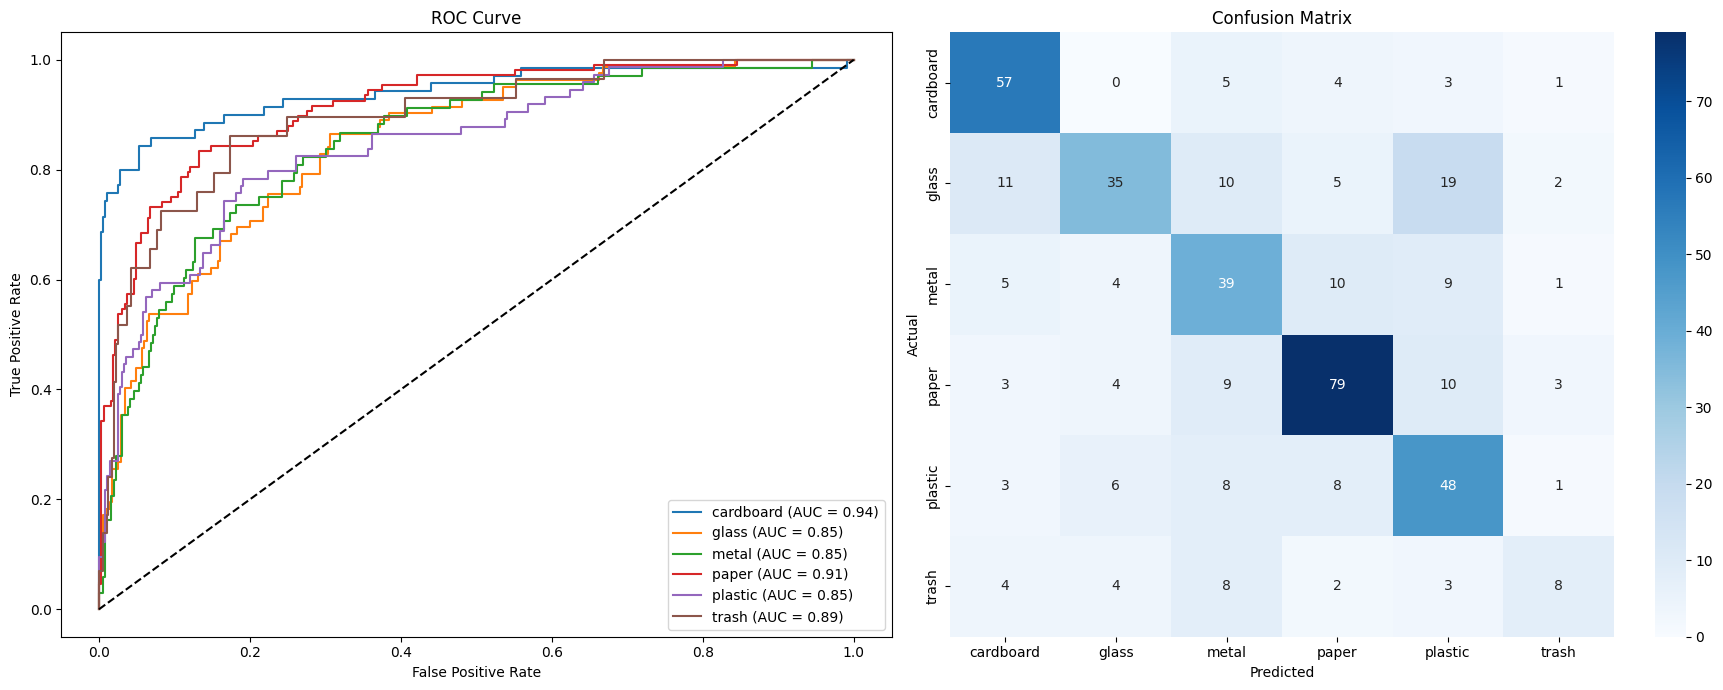

              precision    recall  f1-score   support

   cardboard       0.69      0.81      0.75        70
       glass       0.66      0.43      0.52        82
       metal       0.49      0.57      0.53        68
       paper       0.73      0.73      0.73       108
     plastic       0.52      0.65      0.58        74
       trash       0.50      0.28      0.36        29

    accuracy                           0.62       431
   macro avg       0.60      0.58      0.58       431
weighted avg       0.62      0.62      0.61       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6823 - loss: 1.1069
Test Loss: 1.3365356922149658
Test Accuracy: 0.621809720993042
F1 Score:  0.622809357799372
Precision:  0.6334041674633321
Recall:  0.6218097447795824
Accuracy:  0.6218097447795824


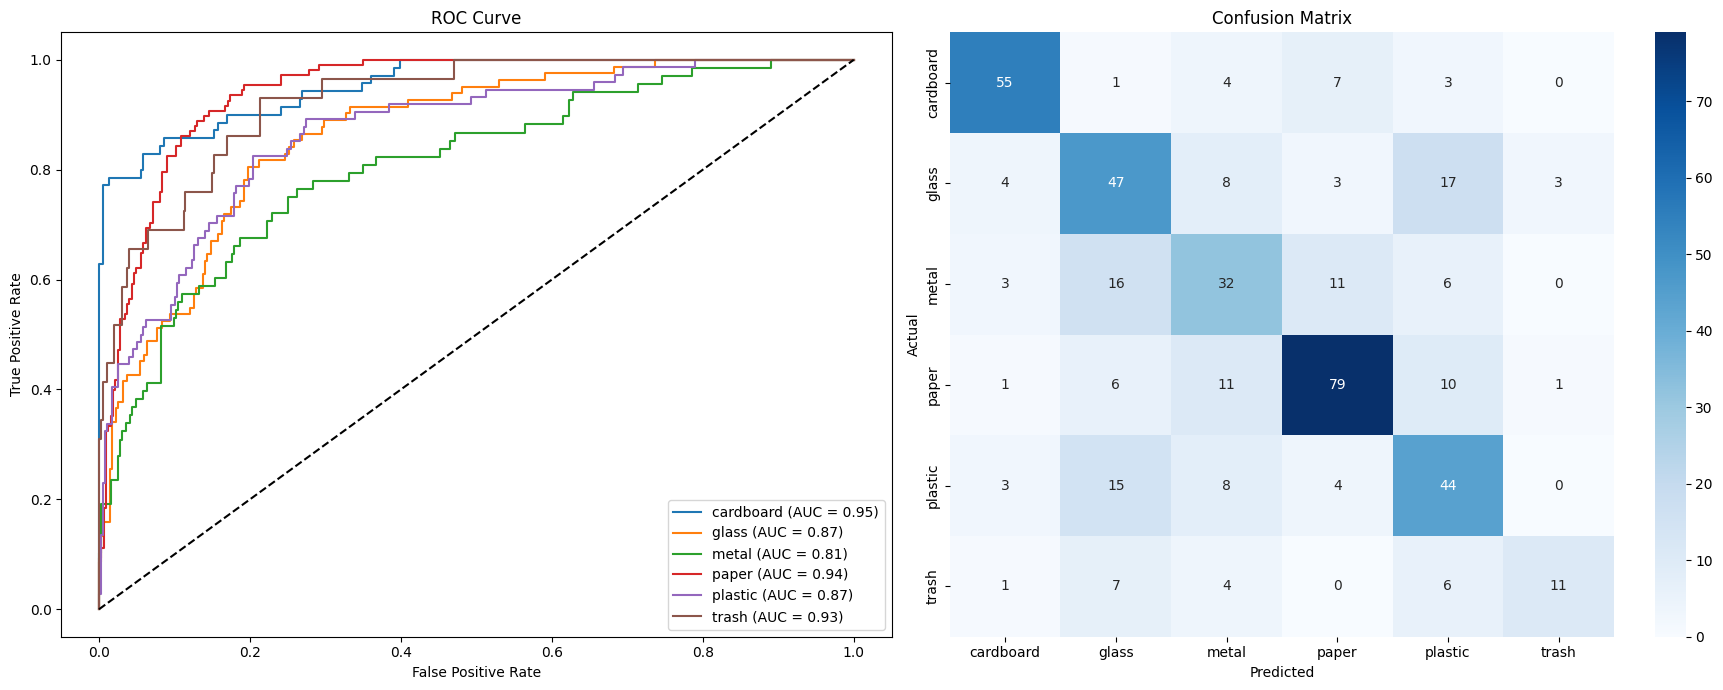

              precision    recall  f1-score   support

   cardboard       0.82      0.79      0.80        70
       glass       0.51      0.57      0.54        82
       metal       0.48      0.47      0.47        68
       paper       0.76      0.73      0.75       108
     plastic       0.51      0.59      0.55        74
       trash       0.73      0.38      0.50        29

    accuracy                           0.62       431
   macro avg       0.64      0.59      0.60       431
weighted avg       0.63      0.62      0.62       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5096 - loss: 2.1195
Test Loss: 2.2030298709869385
Test Accuracy: 0.42227378487586975
F1 Score:  0.38501278289485213
Precision:  0.46063845804344966
Recall:  0.4222737819025522
Accuracy:  0.4222737819025522


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


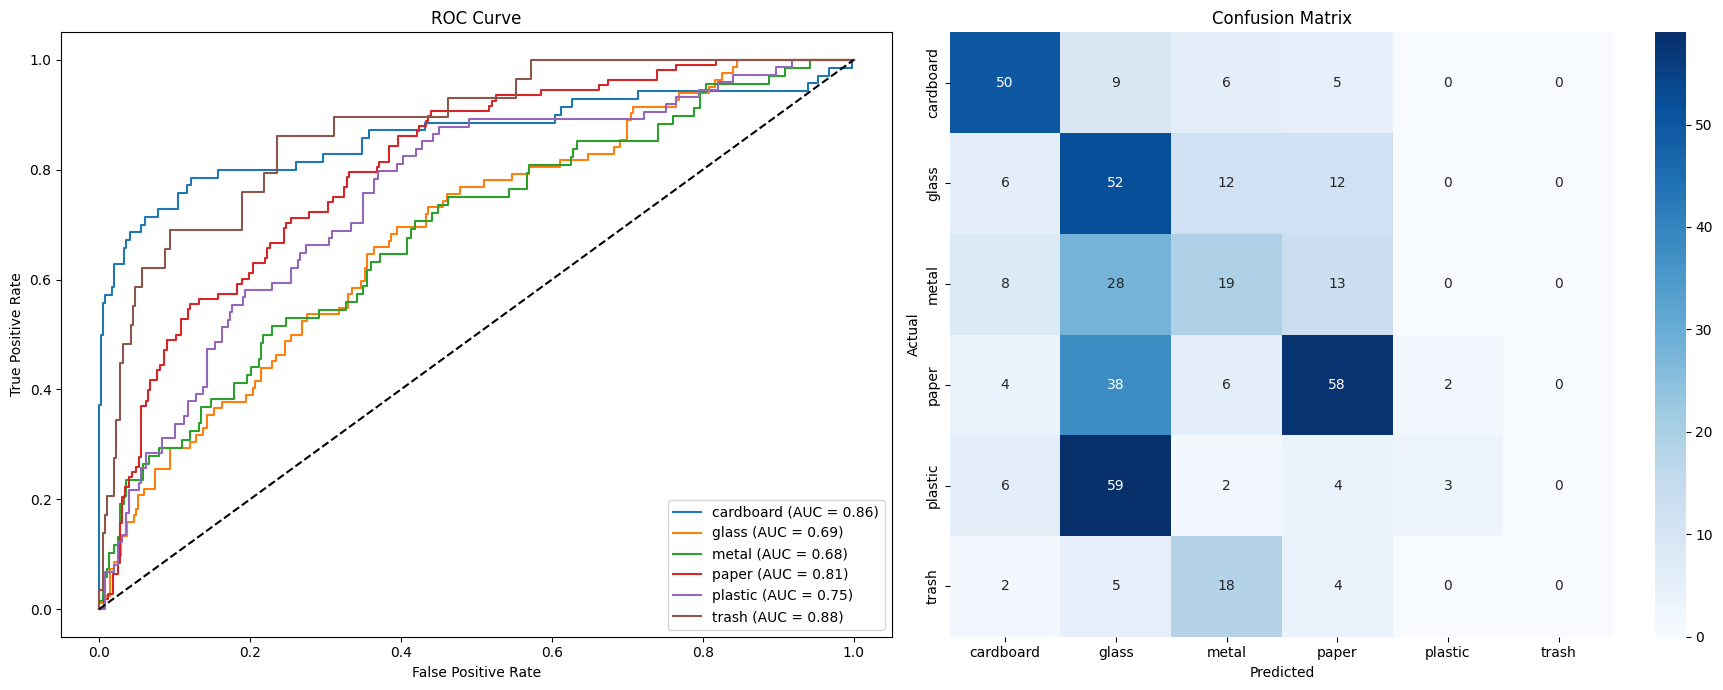

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.66      0.71      0.68        70
       glass       0.27      0.63      0.38        82
       metal       0.30      0.28      0.29        68
       paper       0.60      0.54      0.57       108
     plastic       0.60      0.04      0.08        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.42       431
   macro avg       0.41      0.37      0.33       431
weighted avg       0.46      0.42      0.39       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6778 - loss: 0.9275
Test Loss: 1.0967458486557007
Test Accuracy: 0.6496519446372986
F1 Score:  0.6499813400721283
Precision:  0.6549498213095502
Recall:  0.6496519721577726
Accuracy:  0.6496519721577726


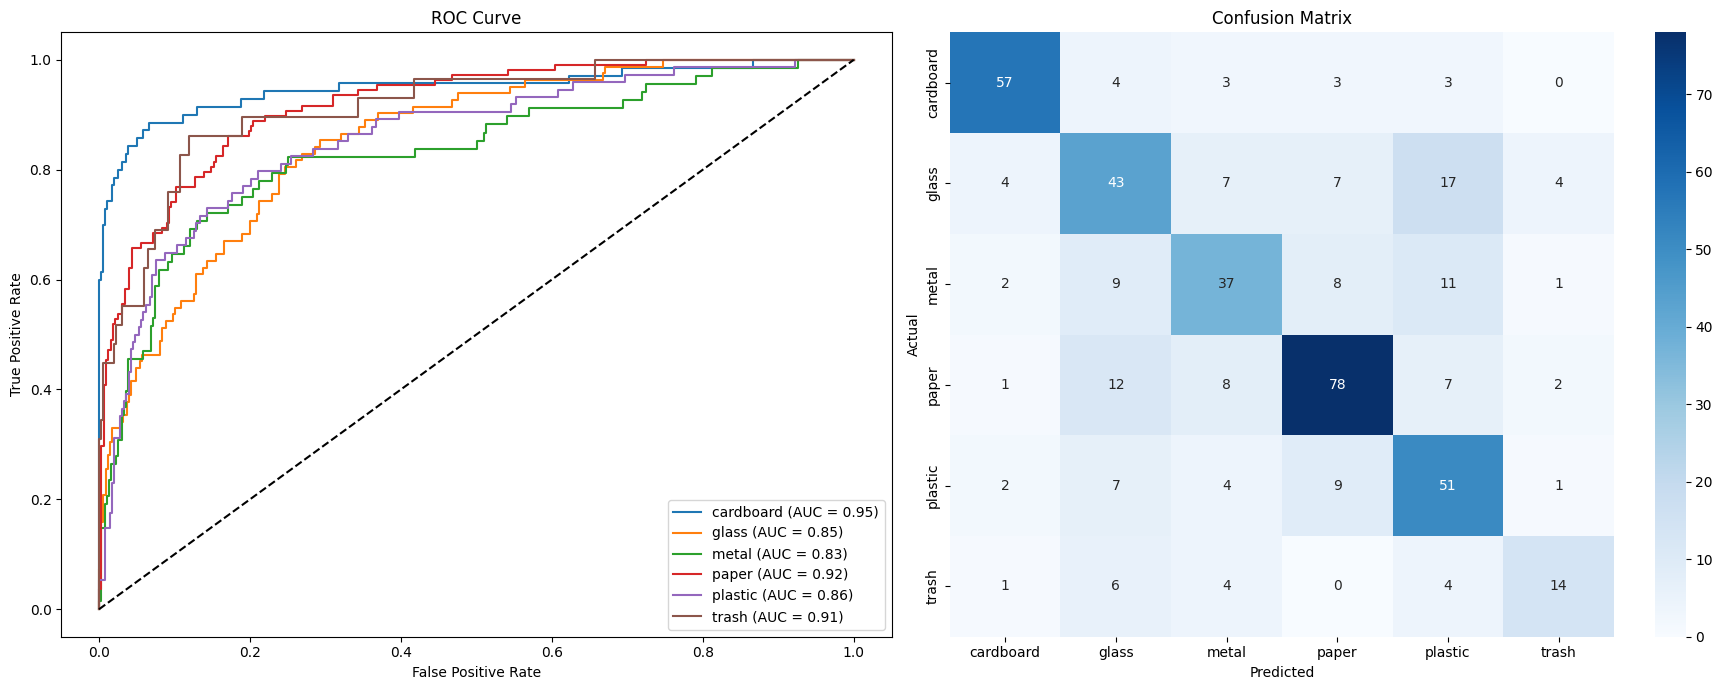

              precision    recall  f1-score   support

   cardboard       0.85      0.81      0.83        70
       glass       0.53      0.52      0.53        82
       metal       0.59      0.54      0.56        68
       paper       0.74      0.72      0.73       108
     plastic       0.55      0.69      0.61        74
       trash       0.64      0.48      0.55        29

    accuracy                           0.65       431
   macro avg       0.65      0.63      0.64       431
weighted avg       0.65      0.65      0.65       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6581 - loss: 0.9585
Test Loss: 1.0821939706802368
Test Accuracy: 0.6264501214027405
F1 Score:  0.6251928807055406
Precision:  0.6457441405644878
Recall:  0.6264501160092807
Accuracy:  0.6264501160092807


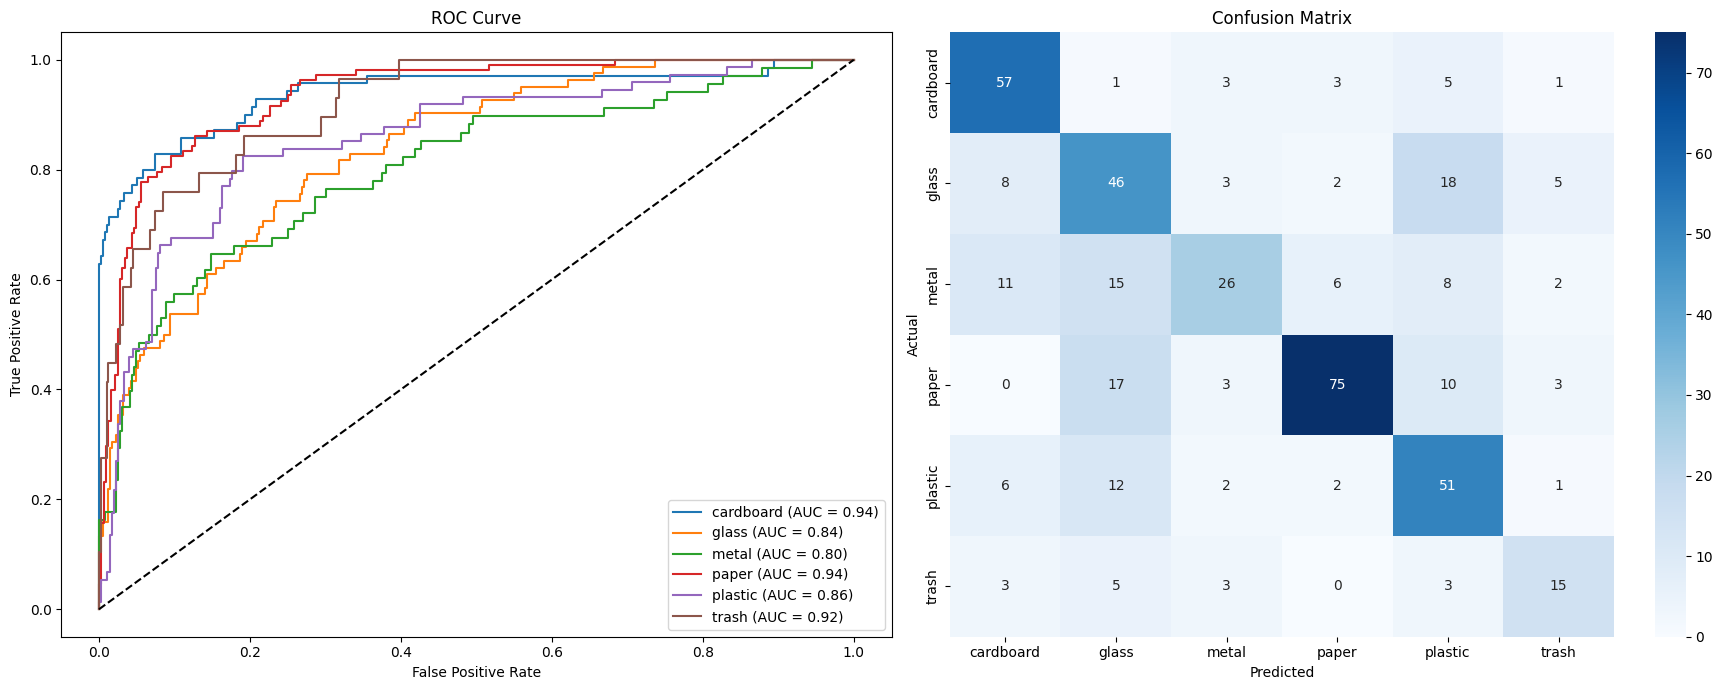

              precision    recall  f1-score   support

   cardboard       0.67      0.81      0.74        70
       glass       0.48      0.56      0.52        82
       metal       0.65      0.38      0.48        68
       paper       0.85      0.69      0.77       108
     plastic       0.54      0.69      0.60        74
       trash       0.56      0.52      0.54        29

    accuracy                           0.63       431
   macro avg       0.62      0.61      0.61       431
weighted avg       0.65      0.63      0.63       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6616 - loss: 0.9987
Test Loss: 1.1290303468704224
Test Accuracy: 0.6125289797782898
F1 Score:  0.6061815969026482
Precision:  0.6044713116538517
Recall:  0.6125290023201856
Accuracy:  0.6125290023201856


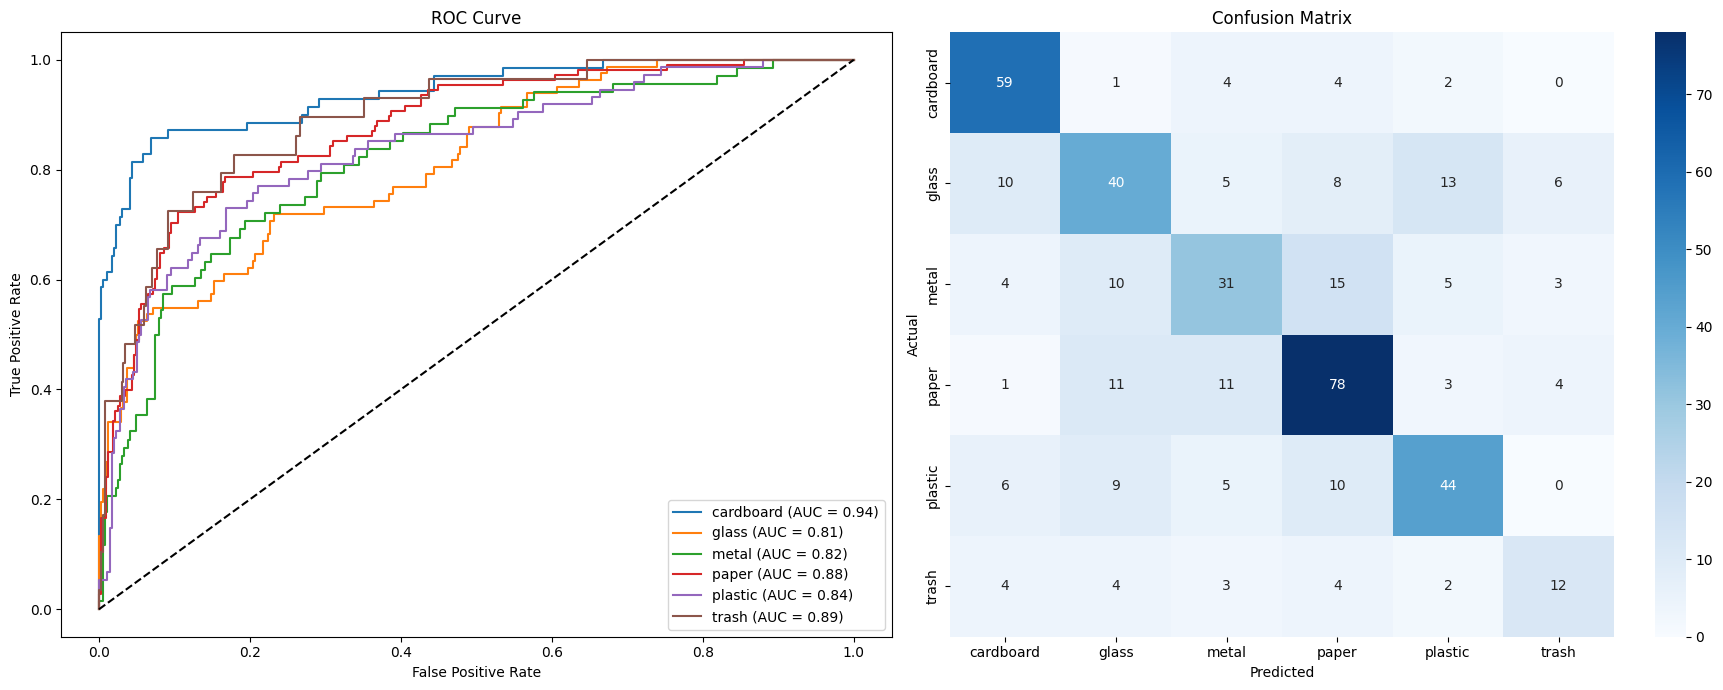

              precision    recall  f1-score   support

   cardboard       0.70      0.84      0.77        70
       glass       0.53      0.49      0.51        82
       metal       0.53      0.46      0.49        68
       paper       0.66      0.72      0.69       108
     plastic       0.64      0.59      0.62        74
       trash       0.48      0.41      0.44        29

    accuracy                           0.61       431
   macro avg       0.59      0.59      0.59       431
weighted avg       0.60      0.61      0.61       431



: 

In [ ]:
# Loading the model ADAM
from keras.models import load_model

print("\nLoading the model")
model = load_model('cnn_model.h5')
model_l2 = load_model('cnn_model_l2.h5')
model_l1 = load_model('cnn_model_l1.h5')
model_dropout = load_model('cnn_model_dropout.h5')
model_es = load_model('cnn_model_es.h5')
model_de = load_model('cnn_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)


In [ ]:
# # Model Evaluation

# # f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# # F1 Score
# f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("F1 Score: ", f1)

# # Precision
# precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("Precision: ", precision)

# # Recall
# recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("Recall: ", recall)

# # Accuracy
# accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
# print("Accuracy: ", accuracy)

# # ROC Curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(6):
#     fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# plt.figure(figsize=(10, 10))

# for i in range(6):
#     plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.title('ROC Curve')
# plt.show()

# # Classification Report
# from sklearn.metrics import classification_report

# print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix

# confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

# plt.figure(figsize=(10, 10))
# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)